### User settings

---

1) Keep the file structure like this:

    normaliser_data/
    
        Subject01_YG/
                HDF5/
                    fp_deepinsight and trained model...
                Intermediate_data/ 
                     intermediate .npy file & results
                Plot/
                    store the plot results
                Recordings/
                    ...
                VideoGame/
                    ...
                Info/
                    ...
                    
        Subject02_JY/
                HDF5/
                    fp_deepinsight and trained model...
                Intermediate_data/ 
                     intermediate .npy file & results
                Plot/
                    store the plot results
                Recordings/
                    ...
                VideoGame/
                    ...
                Info/
                    ...
                    
                    
2)  Then set the subject number to run this pipeline↓

In [2]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

from scipy.io import loadmat
from plotly.offline import iplot
import plotly.graph_objs as go
from skimage import io

import mne
from scipy.interpolate import interp1d


import h5py
import numpy as np# Functions & Dataset
import pandas as pd
from scipy.stats import spearmanr

import time
from joblib import Parallel, delayed


In [3]:
#main_folder = '/Volumes/t7/dku2023/ieeg/'
main_folder = 'F:/dku2023/ieeg/'

file_paths = {}


file_paths[1] = {}
file_paths[1]['folder'] = main_folder+'normaliser_data/Subject01_YG/'
file_paths[1]['recordings'] = main_folder+'normaliser_data/Subject01_YG/Recordings/yangge0108_navi.edf'
file_paths[1]['ttl']        = main_folder+'normaliser_data/Subject01_YG/Recordings/Subject01_YG_part2_ttlMarkerNew.txt'
file_paths[1]['game']       = main_folder+'normaliser_data/Subject01_YG/VideoGame/YG20210108Normaliser_navigation_20210108_142413.txt'
file_paths[1]['info'] = {}
file_paths[1]['info']['name'] = 'YG'

file_paths[2] = {}
file_paths[2]['folder'] = main_folder+'normaliser_data/Subject02_JY/'
file_paths[2]['recordings'] = main_folder+'normaliser_data/Subject02_JY/Recordings/jinyong0118_navi.edf'
file_paths[2]['ttl']        = main_folder+'normaliser_data/Subject02_JY/Recordings/Subject02_JY_ttlMarkerNew.txt'
file_paths[2]['game']       = main_folder+'normaliser_data/Subject02_JY/VideoGame/Normaliser_navigation_20210118_144504.txt'
file_paths[2]['info'] = {}
file_paths[2]['info']['name'] = 'JY'

file_paths[3] = {}
file_paths[3]['folder'] = main_folder+'normaliser_data/Subject03_LYY/'
file_paths[3]['recordings'] = main_folder+'normaliser_data/Subject03_LYY/Recordings/linyiyou031002.edf'
file_paths[3]['ttl']        = main_folder+'normaliser_data/Subject03_LYY/Recordings/Subject03_LYY_ttlMarkerNew.txt'
file_paths[3]['game']       = main_folder+'normaliser_data/Subject03_LYY/VideoGame/Normaliser_navigation_20210310_171054.txt'
file_paths[3]['info'] = {}
file_paths[3]['info']['name'] = 'LYY'

file_paths[4] = {}
file_paths[4]['folder'] = main_folder+'normaliser_data/Subject04_YY/'
file_paths[4]['recordings'] = main_folder+'normaliser_data/Subject04_YY/Recordings/yuyue0504.edf'
file_paths[4]['ttl']        = main_folder+'normaliser_data/Subject04_YY/Recordings/Subject04_YY_ttlMarkerNew.txt'
file_paths[4]['game']       = main_folder+'normaliser_data/Subject04_YY/VideoGame/Normaliser_navigation_20210504_135840.txt'
file_paths[4]['info'] = {}
file_paths[4]['info']['name'] = 'YY'

file_paths[6] = {}
file_paths[6]['folder'] = main_folder+'normaliser_data/Subject06_ZQ/'
file_paths[6]['recordings'] = main_folder+'normaliser_data/Subject06_ZQ/Recordings/zhengqiao0531.edf'
file_paths[6]['ttl']        = main_folder+'normaliser_data/Subject06_ZQ/Recordings/Subject06_ZQ_ttlMarkerNew.txt'
file_paths[6]['game']       = main_folder+'normaliser_data/Subject06_ZQ/VideoGame/Normaliser_navigation_20210531_095712Zhengqiao.txt'
file_paths[6]['info'] = {}
file_paths[6]['info']['name'] = 'ZQ'

file_paths[7] = {}
file_paths[7]['folder'] = main_folder+'normaliser_data/Subject07_CLC/'
file_paths[7]['recordings'] = main_folder+'normaliser_data/Subject07_CLC/Recordings/chenlinchao07233.edf'
file_paths[7]['ttl']        = main_folder+'normaliser_data/Subject07_CLC/Recordings/Subject07_CLC_ttlMarkerNew.txt'
file_paths[7]['game']       = main_folder+'normaliser_data/Subject07_CLC/VideoGame/chenlinchao_Normaliser_navigation_20210723_123129.txt'
file_paths[7]['info'] = {}
file_paths[7]['info']['name'] = 'CLC'

file_paths[8] = {}
file_paths[8]['folder'] = main_folder+'normaliser_data/Subject08_SCM/'
file_paths[8]['recordings'] = main_folder+'normaliser_data/Subject08_SCM/Recordings/shenchunmei07301.edf'
file_paths[8]['ttl']        = main_folder+'normaliser_data/Subject08_SCM/Recordings/Subject08_SCM_ttlMarkerNew.txt'
file_paths[8]['game']       = main_folder+'normaliser_data/Subject08_SCM/VideoGame/scm_Normaliser_navigation_20210730_151846.txt'
file_paths[8]['info'] = {}
file_paths[8]['info']['name'] = 'SCM'

file_paths[9] = {}
file_paths[9]['folder'] =main_folder+'normaliser_data/Subject09_LZ/'
file_paths[9]['recordings'] = main_folder+'normaliser_data/Subject09_LZ/Recordings/liuzhe08251.edf'
file_paths[9]['ttl']        = main_folder+'normaliser_data/Subject09_LZ/Recordings/Subject09_LZ_ttlMarkerNew.txt'
file_paths[9]['game']       = main_folder+'normaliser_data/Subject09_LZ/VideoGame/Liuzhe_Normaliser_navigation_20210825_103719.txt'
file_paths[9]['info'] = {}
file_paths[9]['info']['name'] = 'LZ'

file_paths[10] = {}
file_paths[10]['folder'] = main_folder+'normaliser_data/Subject10_ZLX/'
file_paths[10]['recordings'] = main_folder+'normaliser_data/Subject10_ZLX/Recordings/zhoulongxin09031.edf'
file_paths[10]['ttl']        = main_folder+'normaliser_data/Subject10_ZLX/Recordings/Subject10_1_ttlMarkerNew.txt'
file_paths[10]['game']       = main_folder+'normaliser_data/Subject10_ZLX/VideoGame/zhoulongxin_Normaliser_navigation_20210903_103923.txt'
file_paths[10]['info'] = {}
file_paths[10]['info']['name'] = 'ZLX'

file_paths[11] = {}
file_paths[11]['folder'] = main_folder+'normaliser_data/Subject11_WCF/'
file_paths[11]['recordings'] = main_folder+'normaliser_data/Subject10_ZLX/Recordings/wangchunfei0927.edf'
file_paths[11]['ttl']        = main_folder+'normaliser_data/Subject10_ZLX/Recordings/Subject11_ttlMarkerNew.txt'
file_paths[11]['game']       = main_folder+'normaliser_data/Subject10_ZLX/VideoGame/wangchunfei_Normaliser_navigation_20210927_161155.txt'
file_paths[11]['info'] = {}
file_paths[11]['info']['name'] = 'ZLX'
hpc_chan2 = {}

hpc_chan2[1] = ['POL B1', 'POL N1']
hpc_chan2[2] = ['POL B1', 'POL D3']
hpc_chan2[3] = ['POL E1']
hpc_chan2[4] = ['POL I2']
hpc_chan2[7] = ['POL I3']
hpc_chan2[8] = ['POL J1','EEG C1-Ref']
hpc_chan2[9] = ['EEG A1-Ref','POL B2']
hpc_chan2[10] = ['POL K1','EEG A1-Ref']

### Use this selection for bipolarizing
# hpc_chan2[1] = ['POL B1','POL B2']
# hpc_chan2[2] = ['POL B1', 'POL D3']
# hpc_chan2[3] = ['POL E1','POL E2']
# hpc_chan2[4] = ['POL I2','POL I3']
# hpc_chan2[7] = ['POL I3', 'POL I4']
# hpc_chan2[8] = ['POL J1','POL J2']

# deepInsight_encode =  file_paths[sub]['folder'] + 'HDF5/deepInsight_encode.h5' 
# fp_plot = file_paths[sub]['folder'] + 'Plot/'
# fp_data = file_paths[sub]['folder'] + 'Intermediate_data/'


## necessary function

In [4]:
# Loading and parsing each trial video game feature
def structure_gamelog(gamelog):

    trials_data = {}

    reading_navigation_positions = False

    for line in gamelog:


        if line.startswith('Trial ended'):
            trials_data[trial_n]['Trial_ended_time'] = float(line.split(' ')[-1]) 

            trial_duration = trials_data[trial_n]['Trial_ended_time'] - trials_data[trial_n]['Trial_start_time']
            trials_data[trial_n]['trial_duration'] = trial_duration
            trials_data[trial_n]['n_of_objects'] = len(trials_data[trial_n]['Objects_location'])

            trials_data[trial_n]['Navigation'] = np.array(trials_data[trial_n]['Navigation'])
            
            ### Compute velocity from position (navigation) coordinates
            trial_duration = trials_data[trial_n]['Navigation'][:,0][-1] - trials_data[trial_n]['Navigation'][:,0][0]
            # trial_distance in meters
            trial_distance = np.sum(np.abs(np.diff(trials_data[trial_n]['Navigation'][:,1] +1j* trials_data[trial_n]['Navigation'][:,2])))
            trials_data[trial_n]['Velocity'] = trial_distance/trial_duration
            trials_data[trial_n]['Velocity_deg_per_sec'] = trials_data[trial_n]['Velocity'] * np.pi*2
            
            trials_data[trial_n]['Objects_location'] = np.array(trials_data[trial_n]['Objects_location'])

            # trial_distance in angles
            trial_distance = np.unwrap( np.angle( trials_data[trial_n]['Navigation'][:,1] +1j* trials_data[trial_n]['Navigation'][:,2] ) )
            trial_distance = trial_distance[-1] - trial_distance[0]
            trials_data[trial_n]['Trial_distance'] = trial_distance

            ### cue/sec needs to get how many laps were performed and ajust it to the number of items per every lap (2pi)
            this_trial_crossed_objects = trial_distance  * trials_data[trial_n]['n_of_objects'] / np.pi*2
            trials_data[trial_n]['num_cue'] = this_trial_crossed_objects
            trial_cue_per_sec = trials_data[trial_n]['trial_duration'] / this_trial_crossed_objects
            trials_data[trial_n]['trial_cue_per_sec'] = trial_cue_per_sec


            reading_navigation_positions = False


        if reading_navigation_positions==False:

            if line.startswith('Trial number'): 
                trial_n = int(line.split(': ')[1][:-1])
                trials_data[trial_n] = {}
            if line.startswith('Speed'): 
                trials_data[trial_n]['Speed'] = float(line.split('Speed: ')[1][:-1])
            if line.startswith('Ring_size'): 
                trials_data[trial_n]['Ring_size'] = float(line.split('Ring_size: ')[1][:-1])

            if line.startswith('Objects location'):
                ### actualItem  +" "+ itemX +" "+ itemZ +" "+ itemAngle
                trials_data[trial_n]['Objects_location'] = []
            if line.startswith('Item:'):
                trials_data[trial_n]['Objects_location'].append( np.array(line.split('Item: ')[1][:-1].split(' ')).astype(float) )

            if line.startswith('Trial start'):
                trials_data[trial_n]['Navigation'] = []
                reading_navigation_positions = True
                trials_data[trial_n]['Trial_start_time'] = float(line.split(' ')[-1]) 


            if line.startswith('Question onset'):
                trials_data[trial_n]['Testing'] = {}
                trials_data[trial_n]['Testing']['Question_onset'] = float(line.split('Question onset ')[1][:-1])

            if line.startswith('Testing'):            
                tmp_line = line[:-1].split(' ')
                trials_data[trial_n]['Testing']['response_time'] = float(tmp_line[1])
                trials_data[trial_n]['Testing']['cued_object'] = int(tmp_line[3])
                trials_data[trial_n]['Testing']['option_1'] = int(tmp_line[5])
                trials_data[trial_n]['Testing']['option_2'] = int(tmp_line[7])
                trials_data[trial_n]['Testing']['asnwered_object'] = int(tmp_line[9])
                trials_data[trial_n]['Testing']['asnwered_key'] = tmp_line[11]

        elif reading_navigation_positions==True:
            trials_data[trial_n]['Navigation'].append( np.array(line[:-1].split(' ')).astype(float) )

    return trials_data


def interp_f(behavioural_signal, lfp_size):
    n_samples = len(behavioural_signal)
    x = np.linspace(0, n_samples, num=n_samples, endpoint=True)
    interpolate_f = interp1d(x, behavioural_signal, kind='linear')
    new_sampling_space = np.linspace(0, n_samples, num=lfp_size, endpoint=True)
    return interpolate_f(new_sampling_space)


def get_behavioral_position(trials_data, trial_number):
    position_array = []
    for count in range(len(trials_data[trial_number]['Navigation'])):
        time = trials_data[trial_number]['Navigation'][count][0]
        x = trials_data[trial_number]['Navigation'][count][1]
        y = trials_data[trial_number]['Navigation'][count][2]
        position_array.append([trial_number, time, x, y])
        
    return np.array(position_array)


'''
Extract navigation data from recording txt file
Return:
    data selected from hippocampol channel, 
    lfp_theta_filtered, applied norch and theta filter on raw data
    trials_data, extract from game log, see def struct_gamelog
    event_samples, TTL information and index for navigation start, end...etc
    int(raw.info['sfreq']) s_frequency info
'''
def get_subject_data(sub, file_paths, hpc_chan2):

    # Load brain recordings
    raw = mne.io.read_raw_edf(file_paths[sub]['recordings'])
    print("all channel name:", raw.ch_names)
    #print(np.shape(raw))
    # Load TTL events
    TTL = pd.read_csv(file_paths[sub]['ttl'],
                      sep=' ',
                      names=['time', 'type', 'n'])
    #print(TTL)

    # Get hippocampal channels of this subject
    sub_hpc_chans = hpc_chan2[sub]
    data = raw.get_data(picks=sub_hpc_chans)

    # Load videoGame data and structure it by trials
    gamelog = []
    with open(file_paths[sub]['game'], 'r') as f:
        lines = f.readlines()
        for line in lines:
            gamelog.append(line)
    trials_data = structure_gamelog(gamelog)

    ### Load the signal
    # Here loading 2 signals in the Amygdala. This will be specific for each patient.
    lfps = raw.get_data(picks=sub_hpc_chans)

    ## Notch is done to remove the noise from the power line in the building. Since China operates on a 220V voltage and 50Hz and remove the 50Hz and its harmonics (100, 150, etc) to the signal.
    lfp_bp_notch = mne.filter.notch_filter(lfps,
                                           raw.info['sfreq'],
                                           [50., 100., 150., 200.],
                                           notch_widths=.1)
#   lfp_bp_notch = lfp_bp_notch[0] - lfp_bp_notch[1]
    low_freq = 2
    high_freq = 10

    lfp_theta_filtered = mne.filter.filter_data(lfp_bp_notch, int(raw.info['sfreq']), low_freq, high_freq, verbose=False )

    ### TTL markers
    event_samples = np.vstack((
        TTL[TTL['type'] == 2]['time'].values,
        TTL[TTL['type'] == 3]['time'].values,
        TTL[TTL['type'] == 4]['time'].values,
        TTL[TTL['type'] == 5]['time'].values,
    )).T

    return data, lfp_theta_filtered, trials_data, event_samples, int(raw.info['sfreq'])


'''
Deal with ieeg signal data
Return: 
a dict with essential information
physilogical data: a list of the ieeg signal between navigation for all trials
timestamps: a list of index matching physilogical data
position_2d: coordinate..ish matching each timestamp
event_marker: 
'''
def get_preprocess_data(trials_data,markers,physilogical_data,start_end_indice=[0,1],test=False): #trials, event_sample, notch_filtered_data
    
    '''
    start_end_indice:
        markers[:][0] the start of one trial
        markers[:][1] the end of one trial
        markers[:][2] the onset of the testing question
        markers[:][3] the onset of response
    test: 
        True: decode the recall part, no real output(position)
    '''
    physilogical_data_navi= {}

    for chan in range(physilogical_data.shape[0]):
        
        for trial_num in range(min(len(trials_data), len(markers))):  
            behavioural_signal = get_behavioral_position(trials_data, trial_num)
            navi_start = int(markers[trial_num][start_end_indice[0]])
            navi_stop = int(markers[trial_num][start_end_indice[1]])
            lfp_size = abs(navi_stop - navi_start)
            
            if (chan == 0) & (trial_num == 0):
                start_array = np.array([lfp_size])
                timestamps = np.linspace(navi_start,navi_stop-1,lfp_size, dtype=int)
                if test == False :
                    position_2d = np.vstack(( interp_f(behavioural_signal.T[2], lfp_size) , interp_f(behavioural_signal.T[3], lfp_size)))
                
            if (chan == 0) & (trial_num > 0):
                start_array = np.hstack((start_array,np.array([int(start_array[trial_num-1])+lfp_size])))
                timestamps = np.hstack(( timestamps, np.linspace(navi_start,navi_stop-1,lfp_size, dtype=int) ))
                if test == False :
                    position_2d = np.hstack((position_2d, np.vstack(( interp_f(behavioural_signal.T[2], lfp_size) , interp_f(behavioural_signal.T[3], lfp_size)))  ))
                
            if trial_num == 0:
                physilogical_data_navi[chan]= physilogical_data[chan][navi_start:navi_stop]
                
            if trial_num > 0:
                physilogical_data_navi[chan]  = np.hstack((physilogical_data_navi[chan], physilogical_data[chan][navi_start:navi_stop] ))
    
    print(np.shape(timestamps))
    print(np.shape(start_array))
    print(np.shape(np.array([physilogical_data_navi[i] for i in range(len(physilogical_data_navi))]).T))
    if test == True :
        return {
            'physilogical_data': np.array([physilogical_data_navi[i] for i in range(len(physilogical_data_navi))]).T,
            'timestamps': timestamps,
            'event_marker_each_trial': start_array
        }
    if test == False :               
        return {
            'physilogical_data': np.array([physilogical_data_navi[i] for i in range(len(physilogical_data_navi))]).T,
            'timestamps': timestamps,
            'position_2d': position_2d,
            'event_marker_each_trial': start_array
        }

## Load data

## Extract Number of Theta Cycles from physilogical data nad event sample


In [49]:
sub = 8
raw, lfp_theta_filtered, trials_data, event_samples, sfreq = get_subject_data(sub, file_paths, hpc_chan2)
print(min(len(event_samples), len(trials_data)))
preprocess_data = get_preprocess_data(trials_data,event_samples,lfp_theta_filtered)

raw_data = preprocess_data['physilogical_data']
timestamps = preprocess_data['timestamps']
# plt.title('theta_cycle')
# y_axis = raw_data[:, 0]
# p1 = plt.plot(y_axis, marker='o', color = 'green')

print(np.shape(timestamps))
print(np.shape(raw_data))

#Set trial number
trial_total_num = min(len(trials_data), len(event_samples))
channel_num = np.shape(raw_data)[1]
theta_cycle_record = {}
theta_cycle_record['Velocity'] = []
theta_cycle_record['num_cue'] = []
theta_cycle_record['trial_cue_per_sec'] = []
#get timestamp for trial to start and to end
for channel in range(channel_num):
    theta_cycle_record[hpc_chan2[sub][channel]] = []
    i = 0
    for trial_num in range(trial_total_num):

        navi_start = int(event_samples[trial_num][0])
        navi_end = int(event_samples[trial_num][1])

        #Find the index in the preprocess signal array that match the timestamps
        start_index = np.where(timestamps == navi_start)[0][0] if np.any(timestamps == navi_start) else None
        end_index = np.where(timestamps == navi_end - 1)[0][0] if np.any(timestamps == navi_end - 1) else None
        print("got one", start_index, end_index, i)
        i += 1
        assert(timestamps[start_index] == navi_start)
        physilogical_data_navigation = raw_data[start_index:end_index + 1, channel]
        if i > 35:
            print("data:", physilogical_data_navigation)
        count = 0
        index = 0
        while index < np.shape(physilogical_data_navigation)[0] - 1:
            # if the theta signal across 0
            if physilogical_data_navigation[index] * physilogical_data_navigation[index + 1] < 0:
                count += 1
                index += 1
            # if the signal does not across 0
            elif physilogical_data_navigation[index] * physilogical_data_navigation[index + 1] > 0:
                index += 1
            # if signal is 0
            else:
                temp_index = index + 1
                while physilogical_data_navigation[index] * physilogical_data_navigation[temp_index + 1] == 0:
                    temp_index += 1
                if physilogical_data_navigation[index] * physilogical_data_navigation[temp_index + 1] < 0:
                    count += 1
                index = temp_index
        theta_cycle_record[hpc_chan2[sub][channel]].append(count)

for trial_num in range(trial_total_num):
    theta_cycle_record['Velocity'].append(trials_data[trial_num]['Velocity_deg_per_sec'])
    theta_cycle_record['num_cue'].append(trials_data[trial_num]['num_cue'])#? cue density?
    theta_cycle_record['trial_cue_per_sec'].append(trials_data[trial_num]['trial_cue_per_sec'])


# print(theta_cycle_record)
# pd.DataFrame(theta_cycle_record).to_csv(f"theta_cycles/theta_cycle_{sub}_{file_paths[sub]['info']['name']}.csv", index = False)



        
    


Extracting EDF parameters from F:\dku2023\ieeg\normaliser_data\Subject08_SCM\Recordings\shenchunmei07301.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\River\AppData\Local\Temp\ipykernel_21600\1446144735.py:116: RuntimeWarning:

Channel names are not unique, found duplicates for: {'POL 0'}. Applying running numbers for duplicates.



all channel name: ['EEG A1-Ref', 'EEG A2-Ref', 'POL A3', 'POL A4', 'POL A5', 'POL A6', 'POL A7', 'POL A8', 'POL A9', 'POL A10', 'POL A13', 'POL A14', 'POL B1', 'POL B2', 'POL B3', 'POL B4', 'POL B5', 'POL B6', 'POL B7', 'POL E', 'POL B8', 'POL B9', 'POL A11', 'POL A12', 'POL B10', 'POL B11', 'POL B12', 'POL B13', 'POL B14', 'EEG C1-Ref', 'EEG C2-Ref', 'EEG C3-Ref', 'EEG C4-Ref', 'EEG C5-Ref', 'EEG C6-Ref', 'POL C7', 'POL C8', 'POL DC01', 'POL DC02', 'POL DC03', 'POL DC04', 'POL DC05', 'POL DC06', 'POL DC07', 'POL DC08', 'POL DC09', 'POL DC10', 'POL DC11', 'POL DC12', 'POL DC13', 'POL DC14', 'POL DC15', 'POL DC16', 'POL C9', 'POL C10', 'POL C11', 'POL C12', 'POL C13', 'POL C14', 'POL D1', 'POL D2', 'POL D3', 'POL D4', 'POL D5', 'POL D6', 'POL D7', 'POL D8', 'POL D9', 'POL D10', 'POL D11', 'POL D12', 'POL E1', 'POL E2', 'POL E3', 'POL E4', 'POL E5', 'POL E6', 'POL E7', 'POL E8', 'POL E9', 'POL E10', 'POL E11', 'POL E12', 'POL E13', 'POL E14', 'EEG F1-Ref', 'EEG F2-Ref', 'EEG F3-Ref', 'EE

c:\Users\River\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning:

Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.

c:\Users\River\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning:

Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.

c:\Users\River\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning:

Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.

c:\Users\River\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning:

Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.

c:\Users\River\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning:

Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.

c:\Users\River\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: Depr

60
(2109761,)
(60,)
(1291115, 2)
(2109761,)
(1291115, 2)
got one 0 24233 0
got one 24234 53496 1
got one 53497 79272 2
got one 79273 136982 3
got one 136983 174769 4
got one 174770 213644 5
got one 213645 239420 6
got one 239421 264033 7
got one 264034 320280 8
got one 320281 350173 9
got one 350174 406606 10
got one 406607 445357 11
got one 445358 471266 12
got one 471267 499443 13
got one 499444 525100 14
got one 525101 554693 15
got one 554694 610919 16
got one 610920 649587 17
got one 649588 676386 18
got one 676387 703034 19
got one 703035 731991 20
got one 731992 757661 21
got one 757662 786382 22
got one 786383 825275 23
got one 825276 882054 24
got one 882055 920926 25
got one 920927 945018 26
got one 945019 970224 27
got one 970225 995778 28
got one 995779 1052063 29
got one 1052064 1079077 30
got one 1079078 1103312 31
got one 1103313 1132472 32
got one 1132473 1171006 33
got one 1171007 1228425 34
got one 1228426 1265388 35
data: [-1.51651759e-05 -1.49822975e-05 -1.47882682e

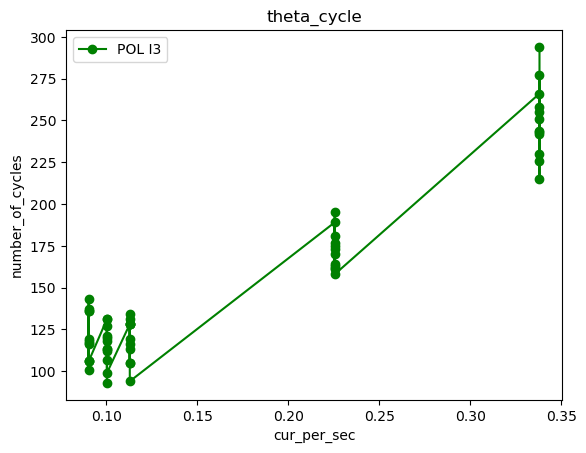

In [28]:
plt.title('theta_cycle')
theta_cycle_record = pd.read_csv(f"theta_cycles/theta_cycle_{sub}_{file_paths[sub]['info']['name']}.csv").to_numpy()
ordered_record = theta_cycle_record[theta_cycle_record[:, 2].argsort()]
x_axis = ordered_record[:,2]
y_axis = ordered_record[:,3]
p1 = plt.plot(x_axis, y_axis, marker='o', label=hpc_chan2[sub][0], color = 'green')
plt.xlabel('cur_per_sec')
plt.ylabel('number_of_cycles')
plt.legend()
plt.savefig(f"C:/Users/River/23summer/dku/ieeg/theta_cycle_graph_cue_per_trial/theta_cycle_{sub}_{file_paths[sub]['info']['name']}.png")


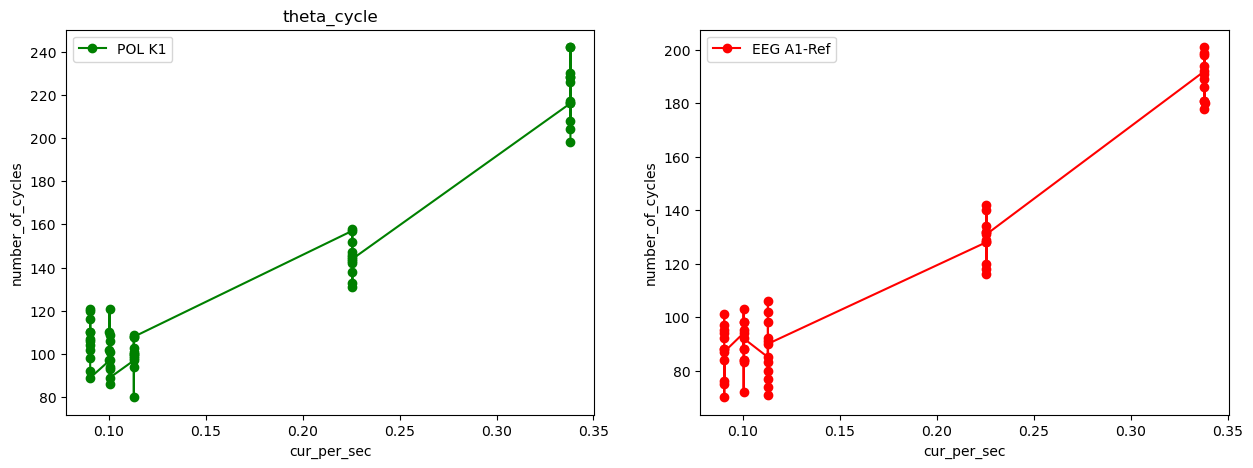

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('theta_cycle')
theta_cycle_record = pd.read_csv(f"theta_cycles/theta_cycle_{sub}_{file_paths[sub]['info']['name']}.csv").to_numpy()
ordered_record = theta_cycle_record[theta_cycle_record[:, 2].argsort()]
x_axis = ordered_record[:,2]
y_axis = ordered_record[:,3]
y_axis2 = ordered_record[:,4]
p1 = plt.plot(x_axis, y_axis, marker='o', label=hpc_chan2[sub][0], color = 'green')
plt.xlabel('cur_per_sec')
plt.ylabel('number_of_cycles')
plt.legend()
plt.subplot(1,2,2)
p2 = plt.plot(x_axis, y_axis2, marker='o', label=hpc_chan2[sub][1], color = 'red')
plt.xlabel('cur_per_sec')
plt.ylabel('number_of_cycles')
plt.legend()
plt.savefig(f"C:/Users/River/23summer/dku/ieeg/theta_cycle_graph_cue_per_trial/theta_cycle_{sub}_{file_paths[sub]['info']['name']}.png")
